# Мататематички методи за машинско учење 2023
## Домаћи задатак број 1

<div class="alert alert-block alert-danger">
<b>Име и презиме студента:</b> Никола Петровић

<b>Број индекса:</b> 1466
    
</div>    

<div class="alert alert-block alert-info">
<b>Упутство за израду и предају домаћег задатака: </b> 
    
    1. Пре почетка израде промените име датотеке у 01Domaci_Ime_Prezime. (убаците своје име и презиме) 
    2. Попуните ћелију испод наслова одговарајућим подацима. 
    1. Употреба ћирилице није обавезна за предају домаћег задатка.
    4. За решавање задатака, уколико је потребно, отворите испод текста задатка додатне ћелије за уписивање текстуалног одговора (Markdown) или програмског кода (Code).
    1. Сва израчунавања, уколико је потребно, вршити у Python-у.
    5. Након завршетка израде решења домаћег Notebook документ сачувати у pdf формату и проследити га наставнику. То можете да урадите или кроз Teams или на мејл адресу jovana.dzunic@elfak.ni.ac.rs

</div> 

In [1]:
import numpy as np
import numpy.random as rndm
import matplotlib as mplb
import matplotlib.pyplot as plt

**Задатак 1.** Дат је низ случајно генерисаних бројева $v=\begin{bmatrix} x_1&x_2&\dots&x_n\end{bmatrix}$ (генерише се кодном ћелијом испод). Два елемента $x_i$ и $x_j$ у низу $v$ образују инверзију уколико је $i<j\ \wedge\ x_i>x_j.$ Написати ефикасан код којим се одређује број инверзија у низу $v.$

(10 поена)

In [2]:
import time

In [3]:
np.random.seed(0)
n = 12345
min_val, max_val = -10, 10
v = np.random.uniform(min_val, max_val, n)

In [4]:
def broj_inverzija_neoptimalno(v):
    count = 0
    for i in range(n):
        for j in range(i+1, n):
            if v[i] > v[j]:
                count += 1
    return count

In [5]:
start_time = time.time()
count = broj_inverzija_neoptimalno(v)
end_time = time.time()

print(f"Broj inverzija: {count}")
print(f"Vreme izvršenja: {end_time - start_time:.6f} sekundi")

Broj inverzija: 38287110
Vreme izvršenja: 14.262183 sekundi


In [6]:
def broj_inverzija_numpy(v):
    count = sum(np.sum(v[i] > v[i+1:]) for i in range(n - 1))
    return count

In [7]:
start_time = time.time()
count = broj_inverzija_numpy(v)
end_time = time.time()
print(f"Broj inverzija: {count}")
print(f"Vreme izvršenja: {end_time - start_time:.6f} sekundi")

Broj inverzija: 38287110
Vreme izvršenja: 0.168723 sekundi


In [8]:
def merge(arr, temp_arr, left, mid, right):
    i, j, k = left, mid, 0
    inv_count = 0

    while i <= mid - 1 and j <= right:
        if arr[i] <= arr[j]:
            temp_arr[k] = arr[i]
            k += 1
            i += 1
        else:
            temp_arr[k] = arr[j]
            inv_count += (mid - i)
            k += 1
            j += 1

    while i <= mid - 1:
        temp_arr[k] = arr[i]
        k += 1
        i += 1

    while j <= right:
        temp_arr[k] = arr[j]
        k += 1
        j += 1

    for i in range(left, right + 1):
        arr[i] = temp_arr[i - left]

    return inv_count

def merge_sort(arr, temp_arr, left, right):
    inv_count = 0
    if left < right:
        mid = (left + right) // 2
        inv_count += merge_sort(arr, temp_arr, left, mid)
        inv_count += merge_sort(arr, temp_arr, mid + 1, right)
        inv_count += merge(arr, temp_arr, left, mid + 1, right)

    return inv_count

def broj_inverzija_merge_sort(v):
    temp_arr = np.zeros(len(v))
    return merge_sort(v, temp_arr, 0, len(v) - 1)

In [9]:
start_time = time.time()
count = broj_inverzija_merge_sort(v)
end_time = time.time()
print(f"Broj inverzija: {count}")
print(f"Vreme izvršenja: {end_time - start_time:.6f} sekundi")

Broj inverzija: 38287110
Vreme izvršenja: 0.109548 sekundi


<div class="alert alert-block alert-info">
<b> Тачно, лепа решења 
    
10/10 поена</b> 
</div>

**Задатак 2.** На сегменту $[-3,5]$ приказати графике функција $ f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2},$ за комбинације вредности параметара  $(\mu,\sigma)\in\{(0,1),(0,2),(0,1/2),(2,1),(2,2)\}.$ Добијени график треба да садржи легенду са вредностима параметара за сваку од функција.

(5 поена)

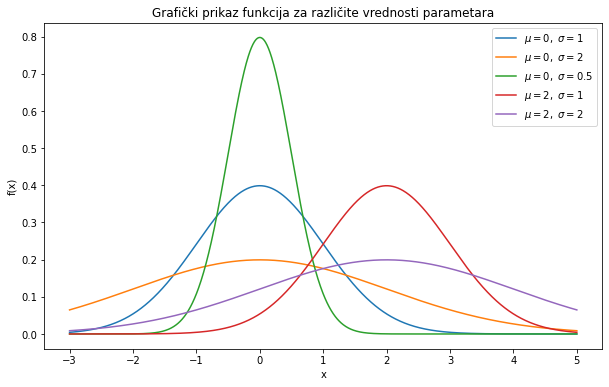

In [10]:
def f(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

x = np.linspace(-3, 5, 1000)
parametri = [(0, 1), (0, 2), (0, 1/2), (2, 1), (2, 2)]

plt.figure(figsize=(10, 6))

for mu, sigma in parametri:
    plt.plot(x, f(x, mu, sigma), label=f'$\mu={mu},\ \sigma={sigma}$')

plt.title("Grafički prikaz funkcija za različite vrednosti parametara")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()


<div class="alert alert-block alert-info">
<b> Тачно
    
5/5 поена</b> 
</div>

**Задатак 3.** а) Направити низ `kocke` од $n\in\{1000,10000\}$ вредности који симулира резултат $n$ бацања фер коцке за игру. Употербити NumPy функцију `randint` за добијање овог низа. 

б) Креирати хистограм резултата бацања за сваку од могућих вредности коцке.

в) Одредити суму свих вредности бачене коцке, као и средњу вредност свих бацања (аритметичку средину).

(5 поена)

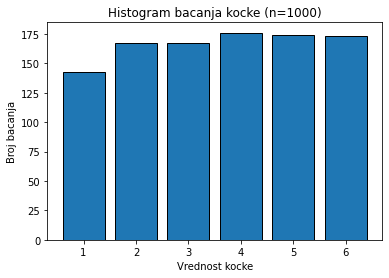

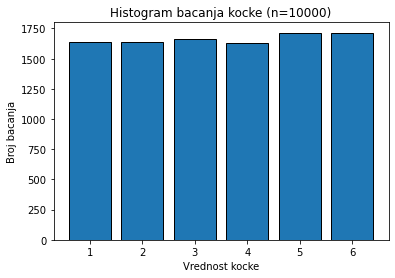

Za n=1000: suma = 3590, srednja vrednost = 3.59
Za n=10000: suma = 35283, srednja vrednost = 3.53


In [11]:
#a)
n1 = 1000
n2 = 10000

kocke_1000 = np.random.randint(1, 7, n1)
kocke_10000 = np.random.randint(1, 7, n2)

#b)
def prikaz_histograma(kocke, naslov):
    plt.hist(kocke, bins=[1, 2, 3, 4, 5, 6, 7], edgecolor='black', align='left', rwidth=0.8)
    plt.title(naslov)
    plt.xlabel('Vrednost kocke')
    plt.ylabel('Broj bacanja')
    plt.xticks(range(1, 7))
    plt.show()

prikaz_histograma(kocke_1000, 'Histogram bacanja kocke (n=1000)')
prikaz_histograma(kocke_10000, 'Histogram bacanja kocke (n=10000)')


#c)
def statistika(kocke):
    suma = np.sum(kocke)
    srednja_vrednost = np.mean(kocke)
    return suma, srednja_vrednost

suma_1000, srednja_vrednost_1000 = statistika(kocke_1000)
suma_10000, srednja_vrednost_10000 = statistika(kocke_10000)

print(f"Za n=1000: suma = {suma_1000}, srednja vrednost = {srednja_vrednost_1000:.2f}")
print(f"Za n=10000: suma = {suma_10000}, srednja vrednost = {srednja_vrednost_10000:.2f}")


<div class="alert alert-block alert-info">
<b> Тачно 
    
5/5 поена</b> 
</div>

**Задатак 4.** На основу скупа података $S=\big\{\big(x_k,f(x_k)\big)\ |\ k=0,1,\dots,n,\ x_i\neq x_j, \ i\neq j\big\}$ о функцији $f_4(x)=\dfrac{1-2x^2}{\cos(e^{2x})+2}$ у чворовима $x_k\in\{-0.66,-0.54,-0.47,-0.33,-0.21,-0.12,0.03,0.11,0.26,0.37,0.41,0.81\}$ написати модификацију Невиловог алгоритма за израчунавање извода интерполационог полинома $P'(0.5)$ на основу шеме
\begin{align}     p_{ii}'(a)&=0,\quad p_{ii}(a)=f(x_i)=f_i\\     
p_{ij}'(a)&=\dfrac{p_{i\,j-1}(a)-p_{i+1\,j}(a)+(a-x_j)p_{i\,j-1}'(a)-(a-x_i)p_{i+1\,j}'(a)}{x_i-x_j},\quad i<j,\\
p_{ij}(a)&=\dfrac{(a-x_j)p_{i\,j-1}(a)-(a-x_i)p_{i+1\,j}(a)}{x_i-x_j}\,,\quad i<j.
\end{align} 

(10 поена)

In [12]:

# Čvorovi i vrednosti funkcije f u tim čvorovima
x_cvorovi = np.array([-0.66, -0.54, -0.47, -0.33, -0.21, -0.12, 0.03, 0.11, 0.26, 0.37, 0.41, 0.81])
f_x = (1 - 2 * x_cvorovi**2) / (np.cos(np.exp(2 * x_cvorovi)) + 2)

# Funkcija koja računa izvod polinoma interpolacije
def neville_izvod(x_cvorovi, f_x, a):
    n = len(x_cvorovi)
    p = np.zeros((n, n))
    p_izvod = np.zeros((n, n))
    
    p[:, 0] = f_x
    
    # Računanje polinoma interpolacije i izvoda
    for j in range(1, n):
        for i in range(n - j):
            p[i, j] = ((a - x_cvorovi[j + i]) * p[i, j - 1] - (a - x_cvorovi[i]) * p[i + 1, j - 1]) / (x_cvorovi[i] - x_cvorovi[i + j])
            p_izvod[i, j] = (p[i, j - 1] - p[i + 1, j - 1] + (a - x_cvorovi[j + i]) * p_izvod[i, j - 1] - (a - x_cvorovi[i]) * p_izvod[i + 1, j - 1]) / (x_cvorovi[i] - x_cvorovi[i + j])
    
    # Vrednost izvoda u tački a je poslednja vrednost u poslednjem redu matrice izvoda
    izvod_a = p_izvod[0, -1]
    print(p[0,-1])
    return izvod_a

# Tačka u kojoj se računa izvod
a = 0.5

# Računanje izvoda i ispisivanje rezultata
izvod = neville_izvod(x_cvorovi, f_x, a)
print(f"Izvod polinoma interpolacije u tački {a} je {izvod}")

0.4653276468924462
Izvod polinoma interpolacije u tački 0.5 je -0.7208417928907618


<div class="alert alert-block alert-info">
<b> Добијене вредности су тачне. Само је унутрашњу петљу (по i) требало решити индексирањем.
    
5/10 поена</b> 
</div>

Провера:

In [13]:
n = len(x_cvorovi)
P=np.polyfit(x_cvorovi,f_x,n-1)
np.polyval(P,a)

0.465327646892453

In [14]:
P1=np.polyder(P)
np.polyval(P1,a)

-0.7208417928905542

<b><span style="font-size: 44px; color: purple;">Ispravak</span></b>



\begin{align}     p_{ii}'(a)&=0,\quad p_{ii}(a)=f(x_i)=f_i\\     
p_{ij}'(a)&=\dfrac{p_{i\,j-1}(a)-p_{i+1\,j}(a)+(a-x_j)p_{i\,j-1}'(a)-(a-x_i)p_{i+1\,j}'(a)}{x_i-x_j},\quad i<j,\\
p_{ij}(a)&=\dfrac{(a-x_j)p_{i\,j-1}(a)-(a-x_i)p_{i+1\,j}(a)}{x_i-x_j}\,,\quad i<j.
\end{align} 


In [62]:
# Čvorovi i vrednosti funkcije f u tim čvorovima
x_cvorovi = np.array([-0.66, -0.54, -0.47, -0.33, -0.21, -0.12, 0.03, 0.11, 0.26, 0.37, 0.41, 0.81])
f_x = (1 - 2 * x_cvorovi**2) / (np.cos(np.exp(2 * x_cvorovi)) + 2)

# Funkcija koja računa izvod polinoma interpolacije
def neville_izvod(x_cvorovi, f_x, a):
    n = len(x_cvorovi)
    p = np.zeros((n, n))
    p_izvod = np.zeros((n, n))
    
    p[:, 0] = f_x
    
    # Računanje polinoma interpolacije i izvoda
    """for j in range(1, n):
        for i in range(n - j):
            p[i, j] = ((a - x_cvorovi[j + i]) * p[i, j - 1] - (a - x_cvorovi[i]) * p[i + 1, j - 1]) / (x_cvorovi[i] - x_cvorovi[i + j])
            p_izvod[i, j] = (p[i, j - 1] - p[i + 1, j - 1] + (a - x_cvorovi[j + i]) * p_izvod[i, j - 1] - (a - x_cvorovi[i]) * p_izvod[i + 1, j - 1]) / (x_cvorovi[i] - x_cvorovi[i + j])
    """
    for j in range(1, n):
        i = np.arange(n - j)
        x_diff = x_cvorovi[i] - x_cvorovi[i + j]
        p[i, j] = ((a - x_cvorovi[j + i]) * p[i, j - 1] - (a - x_cvorovi[i]) * p[i + 1, j - 1]) / x_diff
        p_izvod[i, j] = (p[i, j - 1] - p[i + 1, j - 1] + (a - x_cvorovi[j + i]) * p_izvod[i, j - 1] - (a - x_cvorovi[i]) * p_izvod[i + 1, j - 1]) / x_diff

    # Vrednost izvoda u tački a je poslednja vrednost u poslednjem redu matrice izvoda
    izvod_a = p_izvod[0, -1]
    print(p[0,-1])
    return izvod_a

# Tačka u kojoj se računa izvod
a = 0.5

# Računanje izvoda i ispisivanje rezultata
izvod = neville_izvod(x_cvorovi, f_x, a)
print(f"Izvod polinoma interpolacije u tački {a} je {izvod}")

0.4653276468924462
Izvod polinoma interpolacije u tački 0.5 je -0.7208417928907618


In [61]:
import numpy as np

x_cvorovi = np.array([-0.66, -0.54, -0.47, -0.33, -0.21, -0.12, 0.03, 0.11, 0.26, 0.37, 0.41, 0.81])
f_x = (1 - 2 * x_cvorovi**2) / (np.cos(np.exp(2 * x_cvorovi)) + 2)

def neville_izvod(x_cvorovi, f_x, a):
    n = len(x_cvorovi)-1
    p_izvod = np.zeros(len(f_x))
    p = f_x
    Axk = a-x_cvorovi
    
    for i in range(n):
        p_izvod[:n-i] = (p[:n-i] - p[1:n-i+1] + Axk[i+1:]*p_izvod[:n-i] - Axk[:n-i]*p_izvod[1:n-i+1])/(x_cvorovi[:n-i]-x_cvorovi[i+1:])
        p[:n-i]=(Axk[i+1:]*p[:n-i]-Axk[:n-i]*p[1:n-i+1])/(x_cvorovi[:n-i]-x_cvorovi[i+1:])
    izvod_a = p_izvod[0]
    return izvod_a

a = 0.5
izvod = neville_izvod(x_cvorovi, f_x, a)
print(f"Izvod polinoma interpolacije u tački {a} je {izvod}")


Izvod polinoma interpolacije u tački 0.5 je -0.7208417928907618


<div class="alert alert-block alert-info">
<b> Тачно
    
10/10 поена</b> 
</div>

**Задатак 5.** Претпоставимо да је познат сегмент $[a,b]$ који садржи нулу $\alpha$ глатке функције $f(x).$ Нула је детектована променом знака вредности функције на крајевима интервала, $f(a)f(b)<0.$
<div>
   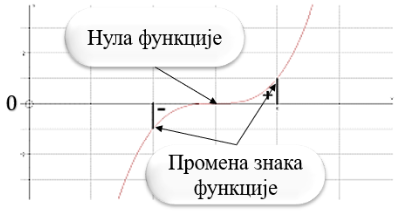  
</div>

Желимо да добијемо ужи сегмент који (највероватније) и даље садржи нулу $\alpha$ функције $f(x).$ То постижемо половљењем почетног сегмента. Наиме $\alpha$ се налази у неком од подсегмената $\left[a,\dfrac{a+b}{2}\right]$ или $\left[\dfrac{a+b}{2},b\right].$ У ком је, препознаћемо поново на основу промене знака функције $f(x)$ на једном од тих сегмената, или се $\alpha$ поклапа баш са $\dfrac{a+b}{2}.$ Уколико је нула детектована, тј. $\alpha=\dfrac{a+b}{2}$ прекидамо потрагу. Ако није сужење интервала можемо да наставимо даљим половљењем кроз итерације. Ово представља метод половљења интервала.

У методу половљења интервала у свакој итерацији се постојећи сегмент $[a_k,b_k]$ дели на два подинтервала. Директна генерализација овог метода јесте дељење постојећег интервала на више делова $p\geq 2:$
$$a_k=c_0<c_1<\dots<c_p=b_k,\qquad c_{j+1}-c_j=\dfrac{b-a}{p}.$$ За нов сегмент $[a_{k+1},b_{k+1}]$ којим се изолује нула узима се сегмент $[c_j,c_{j+1}]$ на коме се детектује промена знака функције $f.$

Написати програмски код којим се реализује оваква претрага са вишеструком поделом интервала који користи векторизацију израчунавања над NumPy низовима. Изабрати самостално вредност параметра $p>2.$ Код применити на изоловање нуле функције $f(x)=\dfrac{x^2}2-\cos x,$ полазећи од сегмента $[-2,2].$ Метод вршити док ширина интервала не буде мања од $10^{-6}.$ Укључити могућност да функција има више нула на изабраном сегменту, тј. да је могуће да више подинтервала детектује промену знака функције.

(20 поена)

In [15]:
def f(x):
    return 0.5 * x ** 2 - np.cos(x)

def find_zeros(a, b, p, tol=1e-6):
    interval_width = b - a
    zeros = []

    while interval_width > tol:
        c_values = np.linspace(a, b, p + 1)
        f_values = f(c_values)
        sign_changes = np.where(np.diff(np.sign(f_values)))[0]

        if len(sign_changes) > 0:
            a = c_values[sign_changes[0]]
            b = c_values[sign_changes[0] + 1]
            interval_width = b - a
            zeros.append((a + b) / 2)
        else:
            break

    return zeros

a, b = -2, 2
p = 5  # Broj delova na koje se interval deli u svakoj iteraciji

zeros = find_zeros(a, b, p)
print("Nule funkcije f(x) su:")
for zero in zeros:
    print(f"{zero:.10f}")

Nule funkcije f(x) su:
-0.8000000000
-0.9600000000
-1.0240000000
-1.0240000000
-1.0214400000
-1.0216960000
-1.0216960000
-1.0216857600
-1.0216898560
-1.0216898560


<div class="alert alert-block alert-info">
<b> Нису испоштовани услови задатка, иначе леп, чист код. 
    
10/20 поена</b> 
</div>

<b><span style="font-size: 44px; color: purple;">Ispravak</span></b>

In [34]:
def f(x):
    return (x**2)/2 - np.cos(x)

def find_zeros(a, b, p, tol):
    zeros = []
    segments = [(a, b)]

    while segments:
        a, b = segments.pop(0)
        c = np.linspace(a, b, p + 1)
        values = f(c)
        sign_changes = np.where(np.diff(np.sign(values)) != 0)[0]

        #Ovaj deo koda koristi NumPy nizove i logicke maske za brze racunanje nula i segmenata.

        a_new, b_new = c[sign_changes], c[sign_changes + 1]
        widths = b_new - a_new

        mask_tol = widths < tol
        mask_not_tol = np.logical_not(mask_tol)

        zeros.extend(((a_new[mask_tol] + b_new[mask_tol]) / 2).tolist())
        segments.extend(zip(a_new[mask_not_tol], b_new[mask_not_tol]))

    return zeros

a, b = -2, 2
p = 5
tol = 1e-6
zeros = find_zeros(a, b, p, tol)

print("Nule funkcije f(x) su:", zeros)

Nule funkcije f(x) su: [-1.0216898559999996, 1.021689856]


In [6]:
def f(x):
    return (x**2)/2 - np.cos(x)

def multi_segment_division(a, b, p, tol):
    zeros = []
    segments = [(a, b)]

    while segments:
        a, b = segments.pop(0)
        c = np.linspace(a, b, p + 1)
        values = f(c)
        sign_changes = np.where(np.diff(np.sign(values)) != 0)[0]

        a_new, b_new = c[sign_changes], c[sign_changes + 1]
        widths = b_new - a_new

        mask_tol = widths < tol
        mask_not_tol = np.logical_not(mask_tol)

        zeros.extend(zip(a_new[mask_tol], b_new[mask_tol]))
        segments.extend(zip(a_new[mask_not_tol], b_new[mask_not_tol]))

    return zeros

a, b = -3, 2
p = 4
tol = 1e-6
zeros = multi_segment_division(a, b, p, tol)

print("Segmenti koji sadrže nule funkcije f(x) su:", zeros)


Segmenti koji sadrže nule funkcije f(x) su: [(-1.0216902494430542, -1.0216899514198303), (1.0216898918151855, 1.0216901898384094)]


<div class="alert alert-block alert-info">
<b> Тачно. Баш лепо!
    
20/20 поена</b> 
</div>

Задата функија $f(x)=\dfrac{x^2}2-\cos x$ на сегменту $[-2,2]$ има две нуле. На наредном активном графику можете курсором и приближно да лоцирате $x$ координате ових нула.

In [16]:
%matplotlib notebook 

<IPython.core.display.Javascript object>


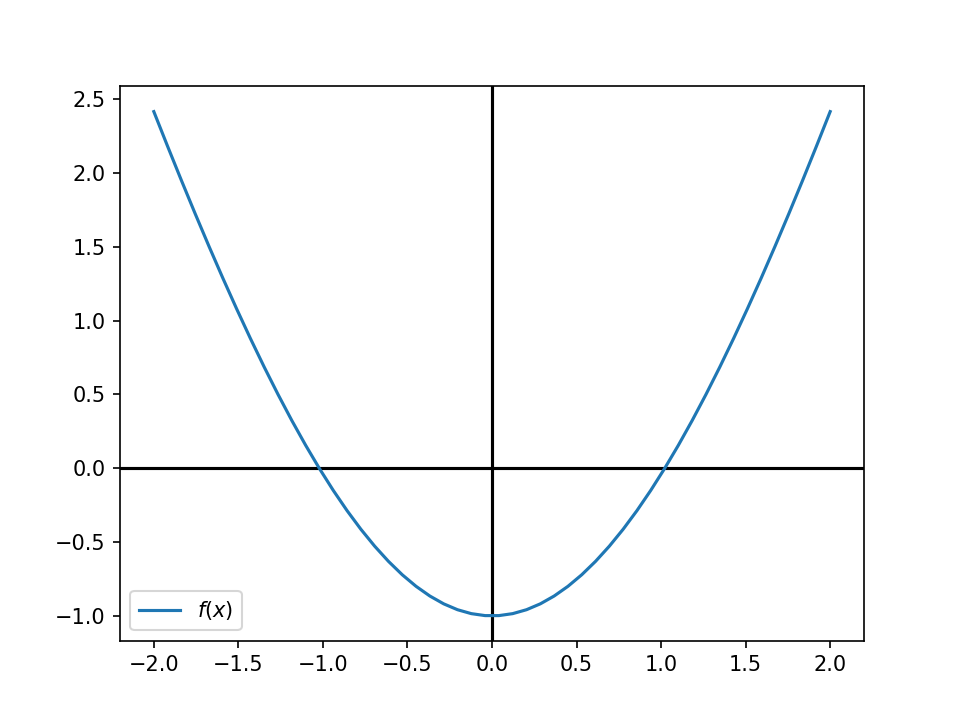

In [17]:
t = np.linspace(-2, 2)
ft=(t**2/2) - np.cos(t)
plt.plot(t, ft, label=r'$f(x)$')
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.legend();

In [18]:
%matplotlib inline

Ваш код треба да врати два сегмента довоњно мале ширине унутар којих се налази по једна нула функције. 

In [19]:
intervali=np.linspace(a,b,p+1)
intervali

array([-2. , -1.2, -0.4,  0.4,  1.2,  2. ])

In [20]:
znak=np.sign(f(intervali)).astype(int)
znak

array([ 1,  1, -1, -1,  1,  1])

Детектујемо почетке интервала промене знака на следећи начин:

In [21]:
indeksi=(znak[:-1]-znak[1:])!=0  
indeksi

array([False,  True, False,  True, False])

Према томе низ левих граница и низ десних граница гласе:

In [22]:
intervali[:-1][indeksi],intervali[1:][indeksi]

(array([-1.2,  0.4]), array([-0.4,  1.2]))

Примећујемо да је једна промена знака на интервалу $[-1.2,-0.4]$ а друга на $[0.4,1.2].$ Те интервале даље делимо на нових $p$ подинтервала.

In [23]:
intervali=np.linspace(intervali[:-1][indeksi],intervali[1:][indeksi],p+1)
intervali

array([[-1.2 ,  0.4 ],
       [-1.04,  0.56],
       [-0.88,  0.72],
       [-0.72,  0.88],
       [-0.56,  1.04],
       [-0.4 ,  1.2 ]])

In [24]:
intervali=intervali.reshape(intervali.size,order='F')
intervali

array([-1.2 , -1.04, -0.88, -0.72, -0.56, -0.4 ,  0.4 ,  0.56,  0.72,
        0.88,  1.04,  1.2 ])

У другој итерацији пронађене интервале сужавамо додатном под поделом.

In [25]:
znak=np.sign(f(intervali)).astype(int)
znak

array([ 1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1])

In [26]:
indeksi=(znak[:-1]-znak[1:])!=0  
indeksi

array([False,  True, False, False, False, False, False, False, False,
        True, False])

In [27]:
intervali[:-1][indeksi],intervali[1:][indeksi]

(array([-1.04,  0.88]), array([-0.88,  1.04]))

У другој итерацији пронађена је једна промена знака на интервалу $[-1.04,-0.88]$ а друга на $[0.88,1.04].$ Итд.

За неку другу функцију и други почетни интервал треба да врати подсегменте који ће детектовати нуле за такву другу функцију. На пример за полином генрисан следећом ћелијом треба да детектује три под интервала ако је полазни $[-3,2].$

In [2]:
koef=np.poly([-2.257,0.345,1.578])
def P(x):
    return np.polyval(koef,x)
a,b,p=-3,2,5

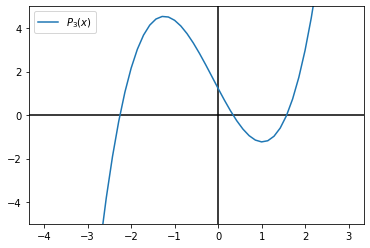

In [3]:
t = np.linspace(-4, 3)
Pt=np.polyval(koef,t)
plt.plot(t, Pt, label=r'$P_3(x)$')
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.ylim([-5,5])
plt.legend();

In [30]:
intervali=np.linspace(a,b,p+1)
intervali

array([-3., -2., -1.,  0.,  1.,  2.])

In [31]:
znak=np.sign(P(intervali)).astype(int)
znak

array([-1,  1,  1,  1, -1,  1])

In [32]:
indeksi=(znak[:-1]-znak[1:])!=0  
indeksi

array([ True, False, False,  True,  True])

In [33]:
intervali[:-1][indeksi],intervali[1:][indeksi]

(array([-3.,  0.,  1.]), array([-2.,  1.,  2.]))

<div class="alert alert-block alert-info">
<b> Укупно 
    
50/50 поена</b> 
</div>

Иначе, не морате толико да одвајате задатке у функције. Ово су кратки задаци, нису вам потребни толико одвојени функционални делови за прегледност. Лепо је, читљиво, само ово нису задаци који захтевају пуно линија. 

Такође, једном учитан модул у Јупитер радну свеску остаје доступан за сваку ћелију радне свеске. Не морате да га учитавате за сваки задатак. 